In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [3]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(7,activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 1.8315 - accuracy: 0.3149

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


23/23 [==============================] - 27s 1s/step - loss: 1.8315 - accuracy: 0.3149 - val_loss: 1.7328 - val_accuracy: 0.4237
Epoch 2/5
23/23 [==============================] - ETA: 0s - loss: 1.5368 - accuracy: 0.4766

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


23/23 [==============================] - 29s 1s/step - loss: 1.5368 - accuracy: 0.4766 - val_loss: 1.3518 - val_accuracy: 0.5480
Epoch 3/5
23/23 [==============================] - ETA: 0s - loss: 1.1713 - accuracy: 0.5887

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


23/23 [==============================] - 26s 1s/step - loss: 1.1713 - accuracy: 0.5887 - val_loss: 1.0856 - val_accuracy: 0.5989
Epoch 4/5
23/23 [==============================] - ETA: 0s - loss: 0.8489 - accuracy: 0.6865

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


23/23 [==============================] - 29s 1s/step - loss: 0.8489 - accuracy: 0.6865 - val_loss: 0.9317 - val_accuracy: 0.6384
Epoch 5/5
23/23 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.7475

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


23/23 [==============================] - 27s 1s/step - loss: 0.6825 - accuracy: 0.7475 - val_loss: 0.7367 - val_accuracy: 0.7458


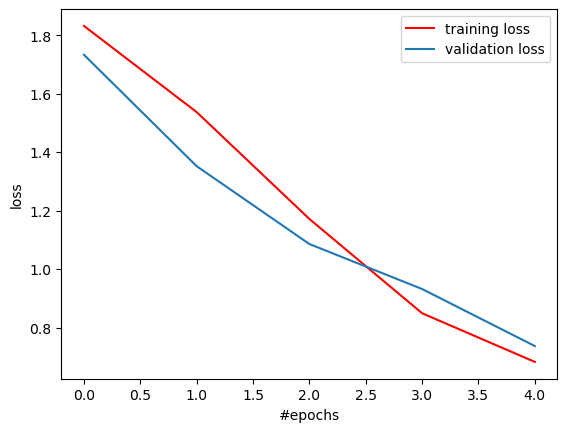

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


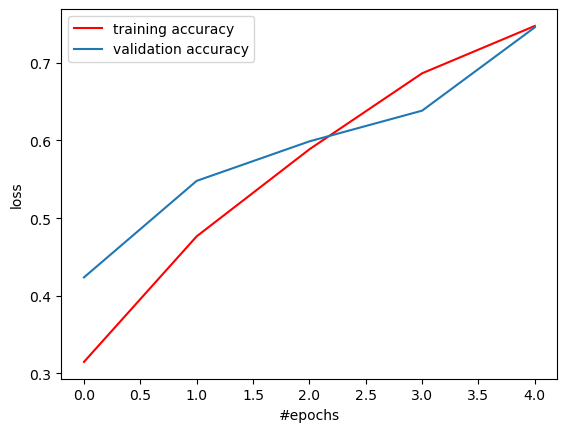

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
model.save("emotiondetector.h5")